In [1]:
import pandas as pd

# Load the bakery sales dataset
bakery_df = pd.read_csv("Bakery_sales.csv")

# Load the special days dataset
dates_df = pd.read_csv("dates.csv")

In [2]:
bakery_df.head(5)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,1/2/2021,8:38,150040,BAGUETTE,1,"0,90 €"
1,1,1/2/2021,8:38,150040,PAIN AU CHOCOLAT,3,"1,20 €"
2,4,1/2/2021,9:14,150041,PAIN AU CHOCOLAT,2,"1,20 €"
3,5,1/2/2021,9:14,150041,PAIN,1,"1,15 €"
4,8,1/2/2021,9:25,150042,TRADITIONAL BAGUETTE,5,"1,20 €"


In [3]:
dates_df.head(5)

,date,day,holiday
0,1-01-23,Fri,New Year's Day
1,4-02-23,Fri,Good Friday
2,4-05-23,Mon,Easter Monday
3,5-01-23,Sat,Labour Day
4,5-08-23,Sat,Victory Day


In [4]:
# Convert date columns to datetime type
bakery_df['date'] = pd.to_datetime(bakery_df['date'])
dates_df['date'] = pd.to_datetime(dates_df['date'])

In [5]:
# Extract year from the date in bakery_df
bakery_df['year'] = bakery_df['date'].dt.year

In [6]:
# Adjust the year in dates_df to match bakery_df
dates_df['date'] = dates_df['date'].apply(lambda x: x.replace(year=bakery_df['year'].unique()[0]))

In [7]:
# Merge dataframes based on date
merged_df = pd.merge(bakery_df, dates_df, on='date', how='left')

In [8]:
# Save the merged dataset
merged_df.to_csv('merged_dataseted.csv', index=False)
merged_df.head(5)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price,year,day,holiday
0,0,2021-01-02,8:38,150040,BAGUETTE,1,"0,90 €",2021,NaN,NaN
1,1,2021-01-02,8:38,150040,PAIN AU CHOCOLAT,3,"1,20 €",2021,NaN,NaN
2,4,2021-01-02,9:14,150041,PAIN AU CHOCOLAT,2,"1,20 €",2021,NaN,NaN
3,5,2021-01-02,9:14,150041,PAIN,1,"1,15 €",2021,NaN,NaN
4,8,2021-01-02,9:25,150042,TRADITIONAL BAGUETTE,5,"1,20 €",2021,NaN,NaN


In [9]:
# to check info for merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234005 entries, 0 to 234004
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  int64         
 4   article        234005 non-null  object        
 5   Quantity       234005 non-null  int64         
 6   unit_price     234005 non-null  object        
 7   year           234005 non-null  int64         
 8   day            6955 non-null    object        
 9   holiday        6955 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 19.6+ MB


In [10]:
# REMOVE ALL EMPTY CELlS

# Load the merged dataset
merged_dff = pd.read_csv('merged_dataseted.csv')

# Drop rows with empty cells (NaN values)
cleaned_df = merged_dff.dropna()

# Save the modified DataFrame to a new CSV file
cleaned_df.to_csv('cleaned.csv', index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3280\4111705601.py:4: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_dff = pd.read_csv('merged_dataseted.csv')


In [11]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6955 entries, 23881 to 129520
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     6955 non-null   int64 
 1   date           6955 non-null   object
 2   time           6955 non-null   object
 3   ticket_number  6955 non-null   int64 
 4   article        6955 non-null   object
 5   Quantity       6955 non-null   int64 
 6   unit_price     6955 non-null   object
 7   year           6955 non-null   int64 
 8   day            6955 non-null   object
 9   holiday        6955 non-null   object
dtypes: int64(4), object(6)
memory usage: 597.7+ KB


In [12]:
cleaned_df

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price,year,day,holiday
23881,52344,2021-04-02,7:38,164264,FORMULE SANDWICH,2,"6,50 €",2021,Fri,Good Friday
23882,52347,2021-04-02,7:50,164265,PAIN AU CHOCOLAT,1,"1,20 €",2021,Fri,Good Friday
23883,52348,2021-04-02,7:50,164265,BAGUETTE,1,"0,90 €",2021,Fri,Good Friday
23884,52351,2021-04-02,7:51,164266,COOKIE,1,"1,00 €",2021,Fri,Good Friday
23885,52352,2021-04-02,7:51,164266,PAIN CHOCO AMANDES,2,"1,50 €",2021,Fri,Good Friday
...,...,...,...,...,...,...,...,...,...,...
129516,281867,2021-12-26,12:56,226255,BOULE 400G,1,"1,50 €",2021,Sun,St Stephen's Day
129517,281868,2021-12-26,12:56,226255,DIVERS BOULANGERIE,1,"6,00 €",2021,Sun,St Stephen's Day
129518,281871,2021-12-26,12:58,226256,PAIN BANETTE,1,"1,40 €",2021,Sun,St Stephen's Day
129519,281874,2021-12-26,13:00,226257,SPECIAL BREAD,1,"2,40 €",2021,Sun,St Stephen's Day


# VISUALIZATIONS

## Time Series Plot:  
Plotting the sales quantity over time provides insight into sales trends, seasonality, and any potential impact of holidays


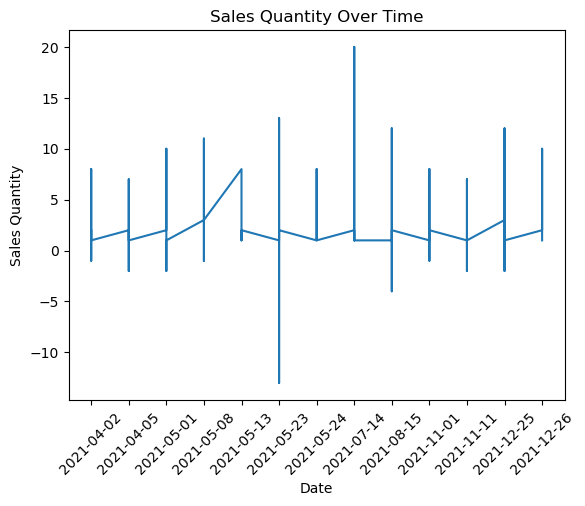

In [13]:
import matplotlib.pyplot as plt

plt.plot(cleaned_df['date'], cleaned_df['Quantity'].dropna())
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity Over Time')
plt.show()


## Bar Chart
Used to display the total sales quantity for different holidays. This visualization help to identify which holidays have a significant impact on sales.

C:\Users\Admin\AppData\Local\Temp\ipykernel_3280\1201232768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['holiday'] = cleaned_df['holiday'].map(str)


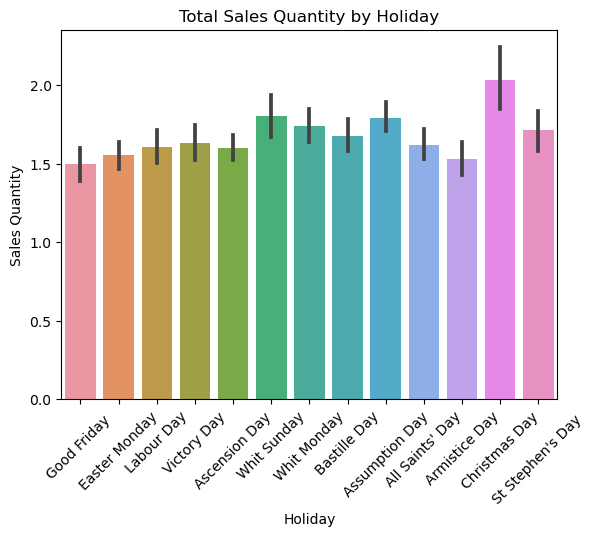

In [17]:
import seaborn as sns
cleaned_df['holiday'] = cleaned_df['holiday'].map(str)

sns.barplot(x='holiday', y='Quantity', data=merged_df)
plt.xlabel('Holiday')
plt.ylabel('Sales Quantity')
plt.title('Total Sales Quantity by Holiday')
plt.xticks(rotation=45)
plt.show()

## Box Plot
To examine the distribution of sales quantity during different holidays. It provides information about the median, quartiles, and any potential outliers.

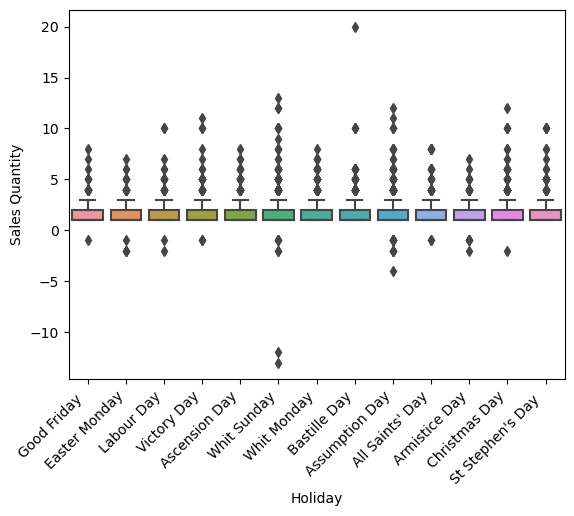

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=cleaned_df, x='holiday', y='Quantity')
plt.xlabel('Holiday')
plt.ylabel('Sales Quantity')

# Adjust the x-axis label rotation and alignment
plt.xticks(rotation=45, ha='right')

plt.show()


## Pie Chart:
To compare the proportion of sales during different holidays, Each slice represents a holiday, and the size of the slice corresponds to the sales percentage.

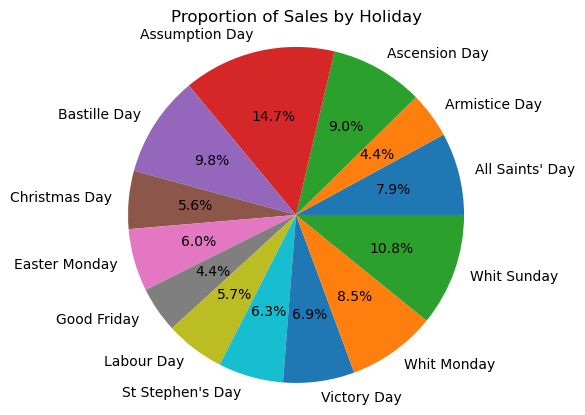

In [19]:
holiday_sales = cleaned_df.groupby('holiday')['Quantity'].sum()
plt.pie(holiday_sales, labels=holiday_sales.index, autopct='%1.1f%%')
plt.title('Proportion of Sales by Holiday')
plt.axis('equal')
plt.show()


## Stacked Bar Chart:
To visualize the distribution of sales quantity or revenue across different holidays,the use of a stacked bar chart. Each bar represents a date, and the different colors represent the contribution of each holiday.

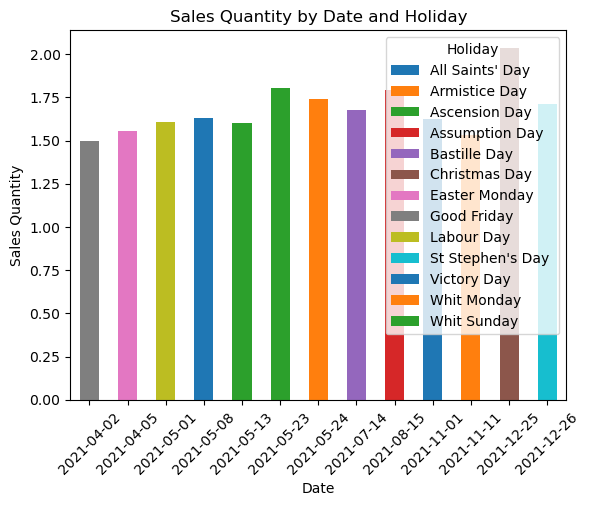

In [20]:
pivot_table = cleaned_df.pivot_table(values='Quantity', index='date', columns='holiday', fill_value=0)
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity by Date and Holiday')
plt.xticks(rotation=45)
plt.legend(title='Holiday')
plt.show()

## Scatter Plot: 
A scatter plot to explore the relationship between these variables and sales quantity. Each data point represents a date, and the position on the scatter plot corresponds to the values of the variables.

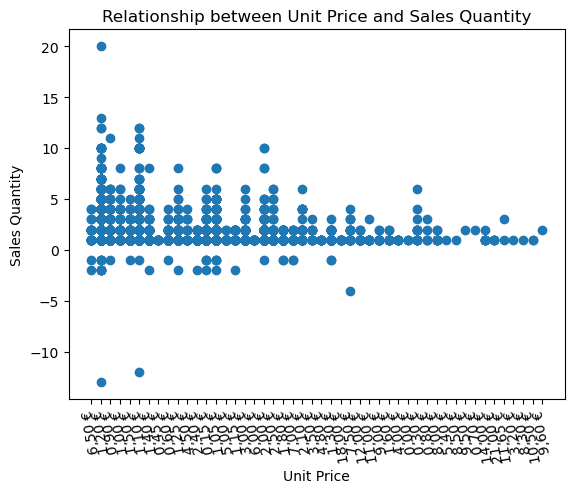

In [21]:
plt.scatter(cleaned_df['unit_price'], cleaned_df['Quantity'])
plt.xlabel('Unit Price')
plt.xticks(rotation=100)
plt.ylabel('Sales Quantity')
plt.title('Relationship between Unit Price and Sales Quantity')
plt.show()


# Statistical l approach

#### Using the SARIMAX (Seasonal Auto-Regressive Integrated Moving Average) model:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the merged dataset
merged_df = pd.read_csv('cleaned.csv')

In [39]:
# Preprocess the data
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df = merged_df.groupby('date')['Quantity'].sum().reset_index()
merged_df

,date,Quantity
0,2021-04-02,519
1,2021-04-05,706
2,2021-05-01,671
3,2021-05-08,806
4,2021-05-13,1053
5,2021-05-23,1272
6,2021-05-24,1003
7,2021-07-14,1145
8,2021-08-15,1725
9,2021-11-01,932


In [36]:
# Split the data into train and test sets
train_size = int(len(merged_df) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = merged_df[:train_size], merged_df[train_size:]
train_size

10

In [37]:
train_data

,date,Quantity
0,2021-04-02,519
1,2021-04-05,706
2,2021-05-01,671
3,2021-05-08,806
4,2021-05-13,1053
5,2021-05-23,1272
6,2021-05-24,1003
7,2021-07-14,1145
8,2021-08-15,1725
9,2021-11-01,932


In [38]:
test_data

,date,Quantity
10,2021-11-11,518
11,2021-12-25,656
12,2021-12-26,735


In [35]:
# Train the SARIMA model
model = SARIMAX(train_data['Quantity'], order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))  # SARIMA(1, 1, 1)(1, 0, 0, 12) model
model_fit = model.fit()

C:\Users\Admin\anaconda3\envs\pandas_playground\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda3\envs\pandas_playground\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Admin\anaconda3\envs\pandas_playground\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
# Forecast future sales
future_forecast = model_fit.get_forecast(steps=len(test_data))
future_forecast_values = future_forecast.predicted_mean
future_forecast_values

10    1325.508368
11    1186.063813
12    1252.370398
Name: predicted_mean, dtype: float64

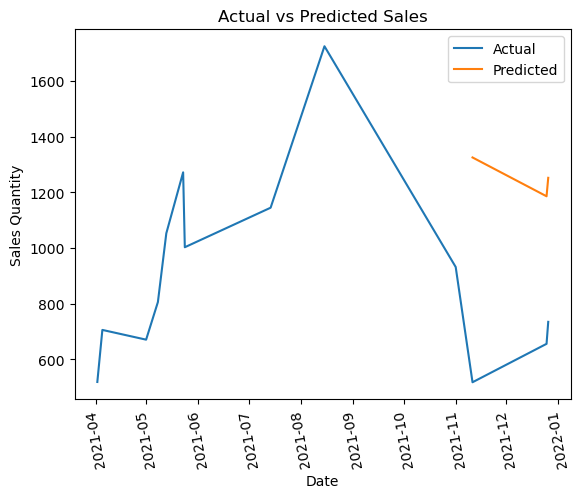

In [29]:
# Visualize the actual and predicted sales
plt.plot(merged_df['date'], merged_df['Quantity'], label='Actual')
plt.plot(test_data['date'], future_forecast_values, label='Predicted')
plt.xlabel('Date')
plt.xticks(rotation=100)
plt.ylabel('Sales Quantity')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# MACHINE LEARNING 
In this case, i decided to use regression models to make predictions. 
Here are the regression models i used for the time series forecasting:
Linear Regression, Random Forest Regression, Gradient Boosting Regression and Support Vector Regression

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the data
data = pd.read_csv('cleaned.csv')

In [54]:
# Preprocess the data
data = data[['date', 'time', 'ticket_number', 'article', 'unit_price', 'year', 'day', 'holiday', 'Quantity']]
data

,date,time,ticket_number,article,unit_price,year,day,holiday,Quantity
0,2021-04-02,7:38,164264,FORMULE SANDWICH,"6,50 €",2021,Fri,Good Friday,2
1,2021-04-02,7:50,164265,PAIN AU CHOCOLAT,"1,20 €",2021,Fri,Good Friday,1
2,2021-04-02,7:50,164265,BAGUETTE,"0,90 €",2021,Fri,Good Friday,1
3,2021-04-02,7:51,164266,COOKIE,"1,00 €",2021,Fri,Good Friday,1
4,2021-04-02,7:51,164266,PAIN CHOCO AMANDES,"1,50 €",2021,Fri,Good Friday,2
...,...,...,...,...,...,...,...,...,...
6950,2021-12-26,12:56,226255,BOULE 400G,"1,50 €",2021,Sun,St Stephen's Day,1
6951,2021-12-26,12:56,226255,DIVERS BOULANGERIE,"6,00 €",2021,Sun,St Stephen's Day,1
6952,2021-12-26,12:58,226256,PAIN BANETTE,"1,40 €",2021,Sun,St Stephen's Day,1
6953,2021-12-26,13:00,226257,SPECIAL BREAD,"2,40 €",2021,Sun,St Stephen's Day,1


In [55]:
# Convert object columns to appropriate data types
data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'])
data['unit_price'] = data['unit_price'].str.replace(' €', '').str.replace(',', '').astype(float)

In [56]:
# Encode categorical columns
label_encoder = LabelEncoder()
data['article'] = label_encoder.fit_transform(data['article'])
data['day'] = label_encoder.fit_transform(data['day'])
data['holiday'] = label_encoder.fit_transform(data['holiday'])

In [64]:
# Separate input features and target variable
X = data[['ticket_number', 'article', 'unit_price', 'year', 'day', 'holiday']]
y = data['Quantity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Perform additional preprocessing (scaling) if required for specific models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# Create and train the models
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train_scaled, y_train)

gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train_scaled, y_train)

support_vector_model = SVR()
support_vector_model.fit(X_train_scaled, y_train)

SVR()

In [73]:
# Make predictions
linear_regression_predictions = linear_regression_model.predict(X_test_scaled)
random_forest_predictions = random_forest_model.predict(X_test_scaled)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test_scaled)
support_vector_predictions = support_vector_model.predict(X_test_scaled)

# Display predictions
print("Linear Regression Predictions:", linear_regression_predictions)
print("Random Forest Predictions:", random_forest_predictions)
print("Gradient Boosting Predictions:", gradient_boosting_predictions)
print("Support Vector Predictions:", support_vector_predictions)

Linear Regression Predictions: [1.89684916 1.55838603 1.83268725 ... 1.83277165 1.40914499 1.57017901]
Random Forest Predictions: [2.82 3.3  1.36 ... 2.59 1.07 1.02]
Gradient Boosting Predictions: [1.96175069 1.78259052 1.93277075 ... 1.93277075 1.46063576 1.08706828]
Support Vector Predictions: [1.21476176 1.09916393 1.89991481 ... 1.89991294 1.09967066 1.10008253]


In [74]:
# Evaluate models
linear_regression_score = linear_regression_model.score(X_test_scaled, y_test)
random_forest_score = random_forest_model.score(X_test_scaled, y_test)
gradient_boosting_score = gradient_boosting_model.score(X_test_scaled, y_test)
support_vector_score = support_vector_model.score(X_test_scaled, y_test)

print("Linear Regression Score:", linear_regression_score)
print("Random Forest Score:", random_forest_score)
print("Gradient Boosting Score:", gradient_boosting_score)
print("Support Vector Score:", support_vector_score)


Linear Regression Score: 0.02947674956134949
Random Forest Score: -0.3017036644654614
Gradient Boosting Score: 0.19489686215978574
Support Vector Score: -0.06071408014295554


### Linear Regression Score: 
The score of approximately 0.029 indicates a relatively low performance of the linear regression model. This score is typically a measure of how well the model fits the data, with higher values indicating a better fit. In this case, the low score suggests that the linear regression model may not be capturing the underlying patterns or relationships in the data very well.

### Random Forest Score:
The score of approximately -0.302 indicates a poor performance of the random forest model. It's unusual to have a negative score for this evaluation metric, as it typically ranges from -∞ to 1. A negative score suggests that the model's predictions are worse than a simple constant model that always predicts the mean of the target variable. This could be an indication that the random forest model is overfitting the training data.

### *Gradient Boosting Score: 
The score of approximately 0.195 suggests a moderate performance of the gradient boosting model. This score indicates that the model fits the data better than the linear regression and random forest models. 

### Support Vector Score: 
The score of approximately -0.061 indicates a relatively poor performance of the support vector model. Like the random forest score, having a negative score for this evaluation metric is unusual. This suggests that the support vector model is not capturing the patterns or relationships in the data well.

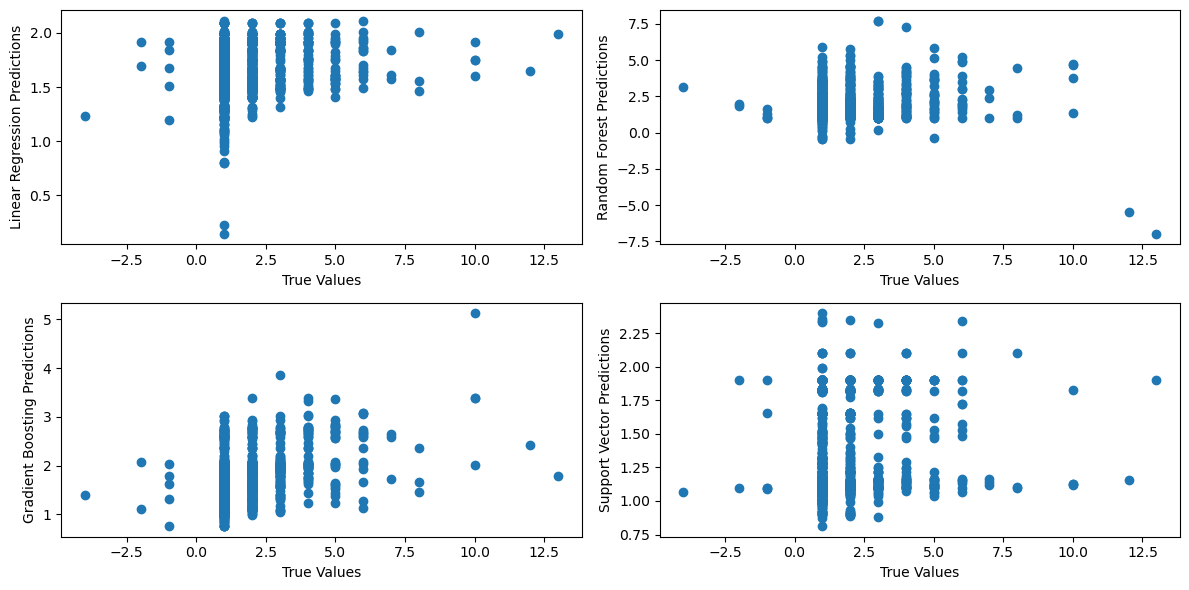

In [81]:
# Visualizations to provide a clearer understanding of the model's performance
import matplotlib.pyplot as plt

# Plotting the predictions
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(y_test, linear_regression_predictions)
plt.xlabel('True Values')
plt.ylabel('Linear Regression Predictions')

plt.subplot(2, 2, 2)
plt.scatter(y_test, random_forest_predictions)
plt.xlabel('True Values')
plt.ylabel('Random Forest Predictions')

plt.subplot(2, 2, 3)
plt.scatter(y_test, gradient_boosting_predictions)
plt.xlabel('True Values')
plt.ylabel('Gradient Boosting Predictions')

plt.subplot(2, 2, 4)
plt.scatter(y_test, support_vector_predictions)
plt.xlabel('True Values')
plt.ylabel('Support Vector Predictions')

plt.tight_layout()
plt.show()
